<a href="https://colab.research.google.com/github/dringtech/apprenticeship-reporting/blob/master/Apprenticeships.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load some libraries

In [0]:
import pandas as pd
from tabulate import tabulate
from IPython.display import HTML, display
import seaborn as sns

The file is downloaded from the gov.uk publication, and stored locally in a zipped Parquet format.

In [0]:
source_spreadsheet = 'https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/789168/Apprenticeship-starts-ach-geography-tool_201718_Q2-201819_Mar2019.xlsx'
apprenticeships_parquet = 'apprenticeships.parquet.gzip'

If the Parquet file exists, it's loaded, otherwise it's pulled from the Gov.uk site, stripped of totals and stored in the workspace.

In [0]:
try:
  data = pd.read_parquet(apprenticeships_parquet)
except OSError:
  data = pd.read_excel(source_spreadsheet, sheet_name='Base Data')
  data = data[
      (data.Level != 'Totals') &
      (data['SSA T1'] != 'Totals') &
      (data.Region != 'Totals') &
      (data.PCON != 'Totals') &
      (data.LA != 'Totals') &
      (data.LAD != 'Totals') &
      (data.Age != 'Totals')
  ]
  data.to_parquet(apprenticeships_parquet, compression='gzip')

The resulting dataframe is categorised in the dimensions listed below.

In [89]:
list(data)

['Level',
 'SSA T1',
 'Region',
 'PCON',
 'LA',
 'LAD',
 'Age',
 '1718_Starts',
 '1819_Q2_Starts',
 '1718_Achievements',
 '1819_Q2_Achievements']

In [118]:
data[data.Region == 'Yorkshire and The Humber'].groupby(['LAD', 'Level'])['1718_Starts'].sum()

LAD                       Level                      
Barnsley                  Advanced Apprenticeship         700
                          Higher Apprenticeship           240
                          Intermediate Apprenticeship     780
Bradford                  Advanced Apprenticeship        1550
                          Higher Apprenticeship           310
                          Intermediate Apprenticeship    2080
Calderdale                Advanced Apprenticeship         880
                          Higher Apprenticeship           170
                          Intermediate Apprenticeship     740
Craven                    Advanced Apprenticeship         190
                          Higher Apprenticeship            30
                          Intermediate Apprenticeship     150
Doncaster                 Advanced Apprenticeship        1020
                          Higher Apprenticeship           210
                          Intermediate Apprenticeship    1180
East Riding of Y

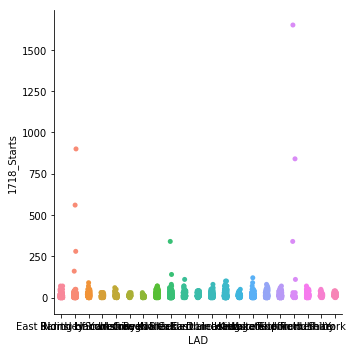

In [119]:
sns.catplot(data=data[data.Region == 'Yorkshire and The Humber'], x='LAD', y='1718_Starts')